# Exploratory Data Analysis on:
## Most Streamed Spotify Songs 2023

In [2]:
#Import Python Libraries needed for the data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load csv file containing the Spotify 2023 Dataset
#Use ISO-8559-1 encoding to handle some of the special characters that might cause issues in UTF-8.
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Overview of Dataset
### Rows and Columns

In [5]:
#Determine number of rows and columns of the dataset using 'shape' attribute from panda
shape = df.shape
row, col = shape
print('Rows:', row)
print('Columns:', col)


Rows: 953
Columns: 24


### Datatypes

In [7]:
#Determine the datatypes of each column using 'dtypes' attribute
datatypes = df.dtypes
print(datatypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


### Missing Values

In [9]:
#Find out if there are any missing values in each columns
#Use .isnull().sum() attribute to determine the number of missing values
missing = df.isnull().sum()
print(missing)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


## Basic Descriptive Statistics
### Mean, Median, and Standard Deviation of the Streams

In [11]:
#Convert non-numeric values in the 'streams' column  to numeric to avoid errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

#Use the mean attribute to determine the streams' mean value
s_mean = df['streams'].mean()

#Use the mean attribute to compute for its median
s_median = df['streams'].median()

#Determine its standard deviation using std attribute
s_std = df['streams'].std()

#Print output
print('Mean:', s_mean)
print('Median:', s_median)
print('Standard Deviation:', s_std)

Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


### Released year & Artist count Distribution and Correlation

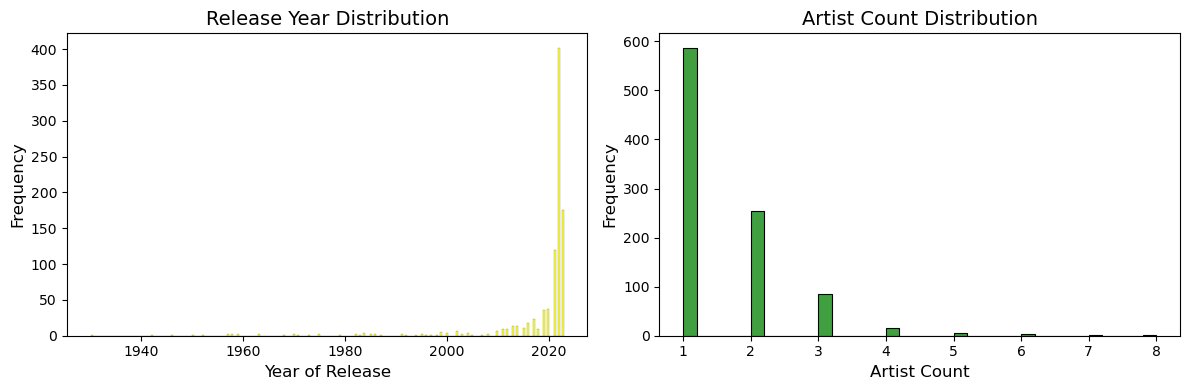

In [13]:
#Create subplots with 1 row and 2 columns for comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

#Create the histogram for released_year
sns.histplot(data=df, x='released_year', color='yellow', ax=axes[0])  # Use the axes parameter to specify the 1st subplot 
axes[0].set_title('Release Year Distribution', fontsize=14)
axes[0].set_xlabel('Year of Release', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

#Create the histogram for artist_count
sns.histplot(data=df, x='artist_count', color='green', ax=axes[1])  # Use axes parameter to specify the 2nd subplot
axes[1].set_title('Artist Count Distribution', fontsize=14)
axes[1].set_xlabel('Artist Count', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

#Adjust the layout of the 2 subplots
plt.tight_layout()

#Show the combined plots
plt.show()

### Trend and Outliers (Scatterplot correlation)

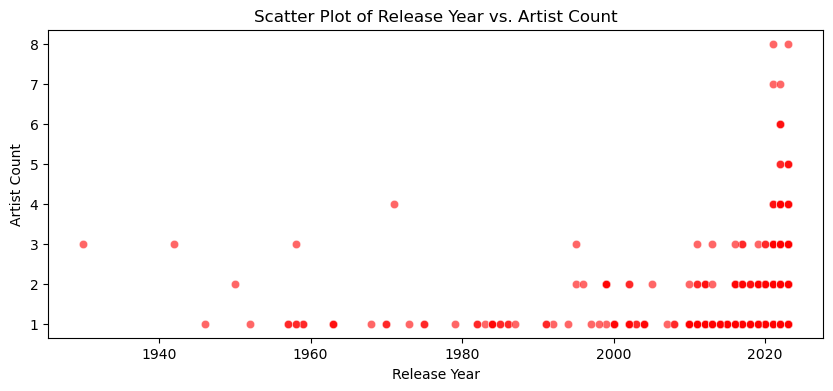

In [15]:
#Create a parameter size for the figure
plt.figure(figsize=(10, 4))

#Create scatterplot and specify the parameters of the figure
sns.scatterplot(data = df, x = 'released_year', y = 'artist_count', alpha = 0.6, color='red')
plt.title('Scatter Plot of Release Year vs. Artist Count')
plt.xlabel('Release Year')
plt.ylabel('Artist Count')

#Show the figure
plt.show()

## Top Performers
### Top 5 Most Streamed tracks

In [17]:
#Sort the DataFrame by streams in descending order
top_streams = df.sort_values(by='streams', ascending=False).head()

#Use head attribute to show top 5
top_streams.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


### Top 5 Most Frequent Artists

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


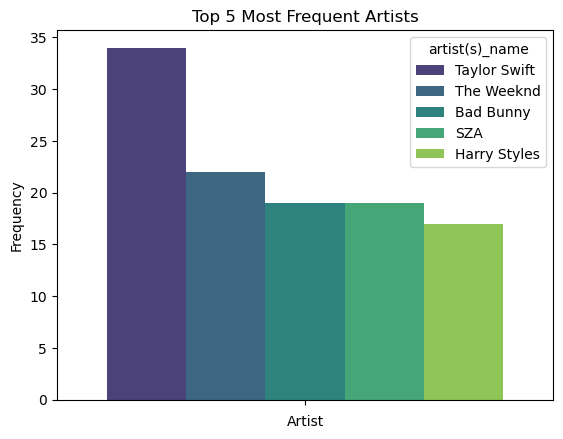

In [19]:
#Count the frequency of each artist and get the top 5
artist_freq = df['artist(s)_name'].value_counts().head()
print(artist_freq)

#Plot the data directly without converting it to a DataFrame
sns.barplot(hue=artist_freq.index, y=artist_freq.values, legend=True, palette='viridis')

#Label the parameters of the bar chart
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Artists')
plt.show()


## Temporal Trends
###  Number of Tracks Released per year

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: count, dtype: int64


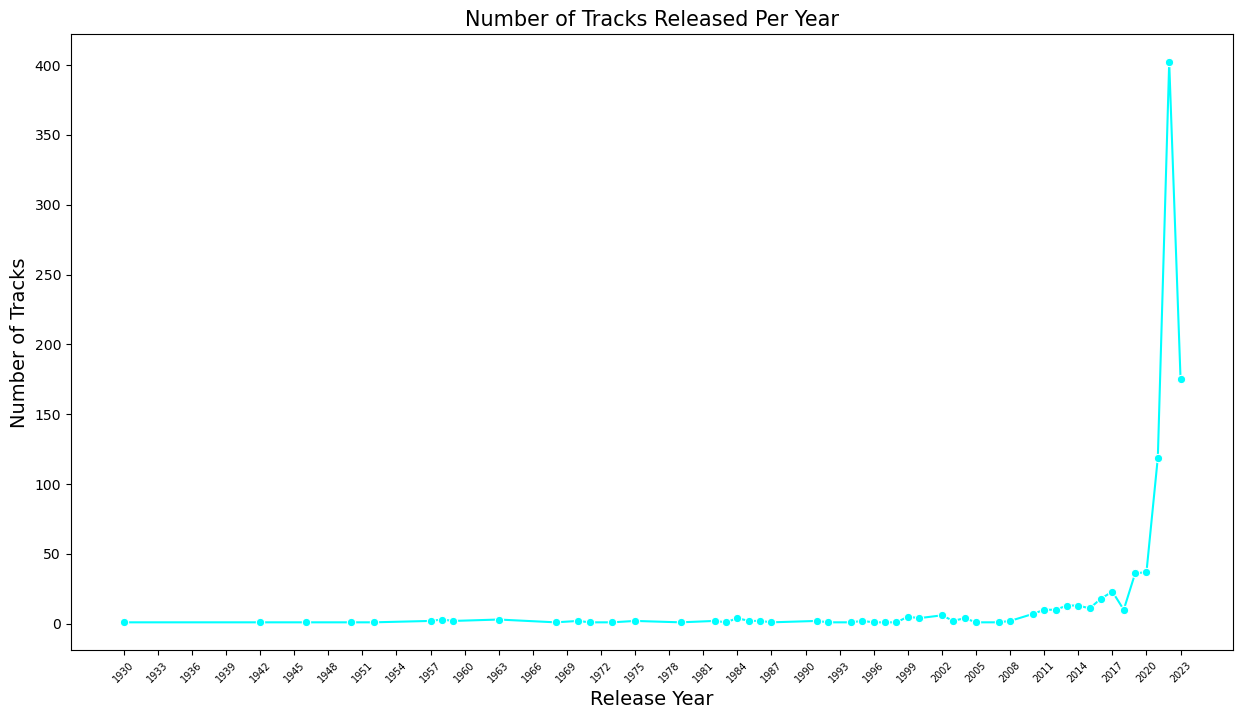

In [21]:
#Count the number of tracks released per year in the dataframe
yearly_tracks = df['released_year'].value_counts().sort_index()
print(yearly_tracks)

#Create a barplot and set the parameters
plt.figure(figsize=(15, 8)) 
sns.lineplot(x=yearly_tracks.index, y=yearly_tracks.values, color='cyan',marker='o', markersize=6, linewidth=1.5)

#Label each axes
plt.title('Number of Tracks Released Per Year', fontsize=15) 
plt.xlabel('Release Year', fontsize=14)  
plt.ylabel('Number of Tracks', fontsize=14)  
plt.xticks(ticks=range(yearly_tracks.index.min(), yearly_tracks.index.max() + 1,3),rotation=45, fontsize=7)  
plt.yticks(fontsize=10)  
plt.show()


### Number of Tracks Released per Month

released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: count, dtype: int64


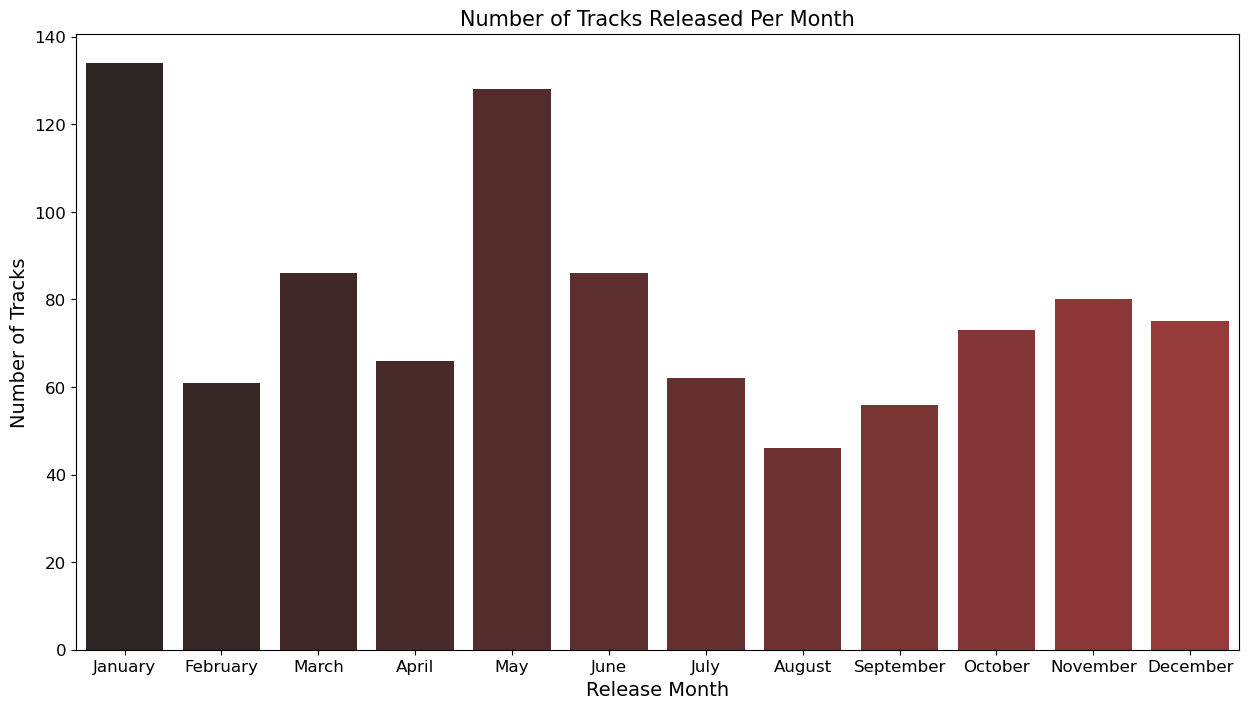

In [23]:
#Count the number of tracks released per year in the dataframe
monthly_tracks = df['released_month'].value_counts().sort_index()
print(monthly_tracks)

#Create a list of the names of the months
month_name = ['January','February','March','April','May','June',
              'July','August','September','October','November','December']

#Create a barplot and set the parameters
plt.figure(figsize=(15, 8)) 
sns.barplot(x=month_name,hue=month_name, y=monthly_tracks.values, palette='dark:brown')

#Label each axes
plt.title('Number of Tracks Released Per Month', fontsize=15) 
plt.xlabel('Release Month', fontsize=14)  
plt.ylabel('Number of Tracks', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()


## Genre and Music Characteristics
### Correlation between streams and musical attributes

Correlation Table:
                     streams       bpm  danceability_%  valence_%  energy_%  \
streams             1.000000 -0.002438       -0.105457  -0.040831 -0.026051   
bpm                -0.002438  1.000000       -0.147095   0.041195  0.025794   
danceability_%     -0.105457 -0.147095        1.000000   0.408451  0.198095   
valence_%          -0.040831  0.041195        0.408451   1.000000  0.357612   
energy_%           -0.026051  0.025794        0.198095   0.357612  1.000000   
acousticness_%     -0.004485 -0.017694       -0.236165  -0.081907 -0.577344   
instrumentalness_% -0.044902 -0.001195       -0.089138  -0.132890 -0.038547   
liveness_%         -0.048337 -0.000761       -0.077538   0.021278  0.117302   
speechiness_%      -0.112333  0.039260        0.184977   0.041081 -0.004846   

                    acousticness_%  instrumentalness_%  liveness_%  \
streams                  -0.004485           -0.044902   -0.048337   
bpm                      -0.017694           -0.00

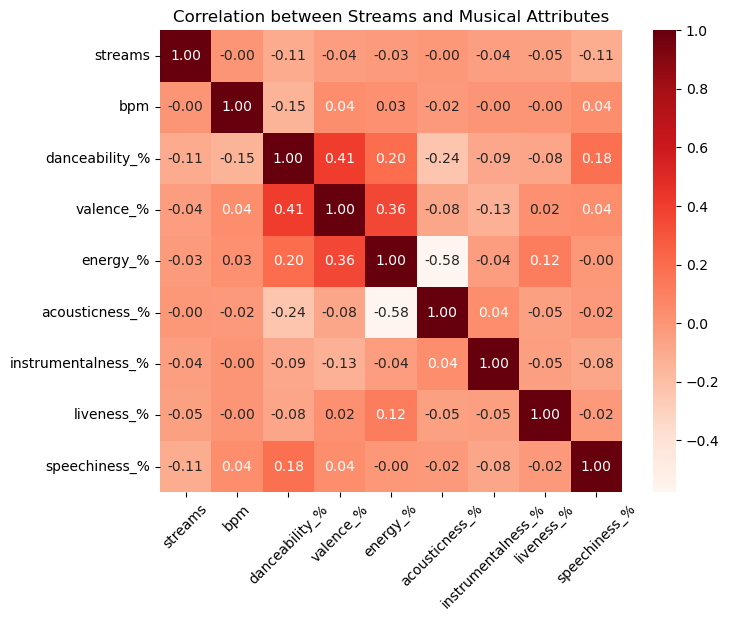

In [25]:
#Find the correlation between streams and music attributes
stream_music_correl = df[['streams','bpm','danceability_%','valence_%','energy_%','acousticness_%',
                  'instrumentalness_%','liveness_%','speechiness_%']].corr()

#Print the correlation table
print("Correlation Table:")
print(stream_music_correl)

#Plot the correlation between streams and music attribute using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(stream_music_correl, annot=True, cmap='Reds', fmt='.2f', square=True)
plt.title('Correlation between Streams and Musical Attributes')
plt.xticks(rotation=45)
plt.show()

### correlation between danceability_% and energy_%, valence_% and acousticness_%

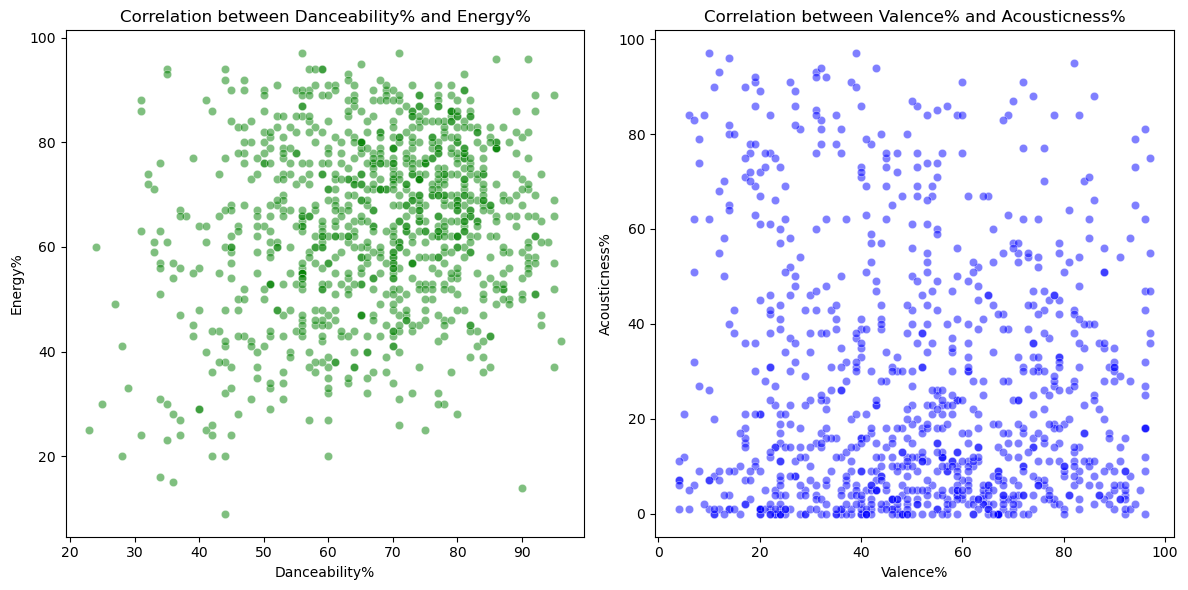


The correlation between Danceability% and Energy% is
                danceability_%  energy_%
danceability_%        1.000000  0.198095
energy_%              0.198095  1.000000 


The correlation between Valence% and Acousticness% is
                valence_%  acousticness_%
valence_%        1.000000       -0.081907
acousticness_%  -0.081907        1.000000 



In [27]:
#Create subplots with 1 row and 2 columns for comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Create scatterplot for dance and energy and specify the parameters 
sns.scatterplot(data = df, x='danceability_%',y='energy_%', alpha = 0.5, color='green',ax=axes[0] )
axes[0].set_title('Correlation between Danceability% and Energy%')
axes[0].set_xlabel('Danceability%')
axes[0].set_ylabel('Energy%')

#Create scatterplot for dance and energy and specify the parameters 
sns.scatterplot(data = df, x='valence_%',y='acousticness_%', alpha = 0.5, color='blue',ax=axes[1] )
axes[1].set_title('Correlation between Valence% and Acousticness%')
axes[1].set_xlabel('Valence%')
axes[1].set_ylabel('Acousticness%')

#Adjust and show the layout of the 2 subplots
plt.tight_layout()
plt.show()

#Show values of correlation
dance_energy = df[['danceability_%', 'energy_%']].corr()
print("\nThe correlation between Danceability% and Energy% is")
print(dance_energy,'\n')

valence_acoustic = df[['valence_%', 'acousticness_%']].corr()
print("\nThe correlation between Valence% and Acousticness% is")
print(valence_acoustic,'\n')


## Platform Popularity
### Comparison between Number of Tracks in Different Platforms 

               Platform  Total Track Count
0  in_spotify_playlists          4955719.0
1     in_spotify_charts            11445.0
2    in_apple_playlists            64625.0
3       in_apple_charts            49469.0
4   in_deezer_playlists            95913.0
5      in_deezer_charts             2541.0
6      in_shazam_charts            45854.0


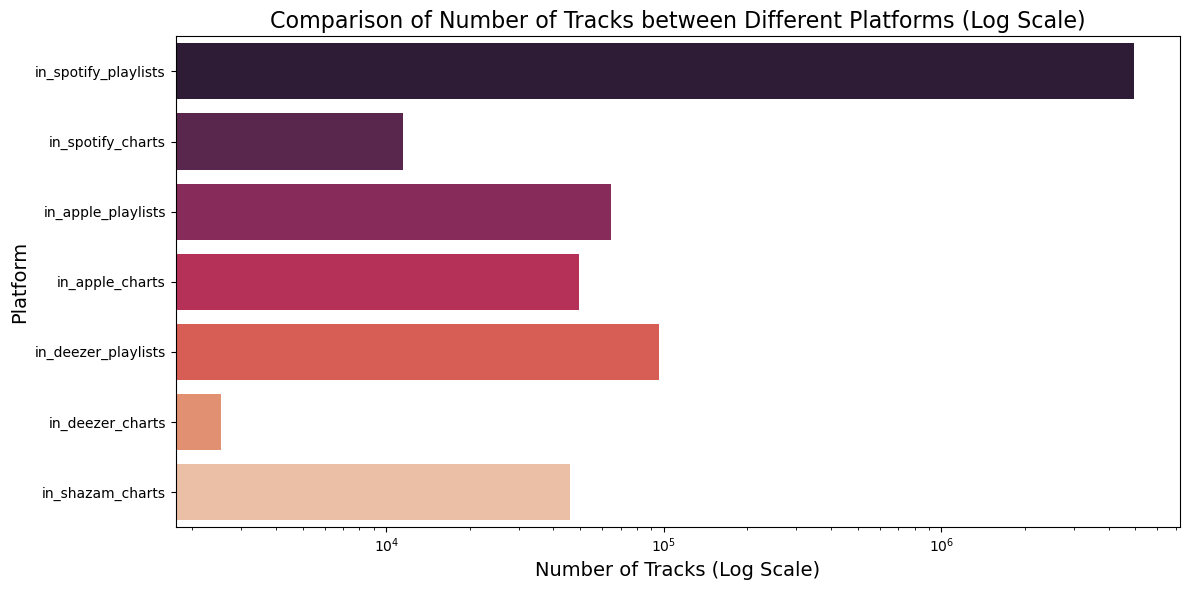

In [29]:
#Store variabe columns to ensure columns are correct
platform = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
                   'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
                   'in_shazam_charts']

#Convert non-numeric values in columns to numeric(to NaN)
for column in platform:
    df[column] = pd.to_numeric(df[column], errors='coerce') 

#Compute for the total of each platform
total = {'in_spotify_playlists': df['in_spotify_playlists'].sum(),'in_spotify_charts': df['in_spotify_charts'].sum(),
    'in_apple_playlists': df['in_apple_playlists'].sum(),'in_apple_charts': df['in_apple_charts'].sum(),
    'in_deezer_playlists': df['in_deezer_playlists'].sum(),'in_deezer_charts': df['in_deezer_charts'].sum(),
    'in_shazam_charts': df['in_shazam_charts'].sum()}

#Create a summary DataFrame
sum_table = pd.DataFrame({'Platform': total.keys(),'Total Track Count': total.values()})

#Display values of the summary
print(sum_table)

#Create the bar plot to compare the number of tracks
plt.figure(figsize=(12, 6))
sns.barplot(data=sum_table, y='Platform',hue='Platform',x ='Total Track Count', palette='rocket')

#Label each parameter and set y-axis to logarithmic scale to compress the range of values
plt.title('Comparison of Number of Tracks between Different Platforms (Log Scale)', fontsize=16)
plt.ylabel('Platform', fontsize=14)
plt.xlabel('Number of Tracks (Log Scale)', fontsize=14)
plt.xscale('log')

#Display plot
plt.tight_layout()
plt.show()

### Most popular tracks  and Different Platforms

In [31]:
#Sort DataFrame by streams in descending order and get the top 10 tracks
top_tracks = df.sort_values(by='streams', ascending=False).head(10)

#Use loc to select different columns to be displayed
top_tracks_table = top_tracks.loc[:, ['track_name', 'streams', 'in_spotify_playlists', 'in_spotify_charts','in_apple_playlists',
                                      'in_apple_charts', 'in_deezer_playlists','in_deezer_charts', 'in_shazam_charts']]

#Display the top tracks table
top_tracks_table

,track_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
55,Blinding Lights,3.703895e+09,43899,69,672,199,NaN,20,NaN
179,Shape of You,3.562544e+09,32181,10,33,0,NaN,7,0.0
86,Someone You Loved,2.887242e+09,17836,53,440,125,NaN,0,NaN
620,Dance Monkey,2.864792e+09,24529,0,533,167,NaN,6,NaN
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09,24094,78,372,117,843.0,4,69.0
162,One Dance,2.713922e+09,43257,24,433,107,NaN,0,26.0
84,STAY (with Justin Bieber),2.665344e+09,17050,36,492,99,798.0,31,0.0
140,Believer,2.594040e+09,18986,23,250,121,NaN,10,31.0
725,Closer,2.591224e+09,28032,0,315,159,NaN,0,44.0
48,Starboy,2.565530e+09,29536,79,281,137,NaN,1,140.0


## Advanced Analysis
### Comparison Among Tracks with the same Key or Mode (Major vs. Minor)

   key   mode  total_streams
6   C#  Major   4.588695e+10
8    D  Major   3.775319e+10
20  G#  Major   3.438568e+10
18   G  Major   3.253676e+10
5    B  Minor   2.679551e+10
7   C#  Minor   2.662668e+10
17  F#  Minor   2.560616e+10
14   F  Major   2.322897e+10
13   E  Minor   2.287469e+10
15   F  Minor   1.846276e+10
2   A#  Major   1.694341e+10
0    A  Major   1.648037e+10
4    B  Major   1.527168e+10
3   A#  Minor   1.454769e+10
1    A  Minor   1.377389e+10
12   E  Major   1.293014e+10
16  F#  Major   1.252635e+10
19   G  Minor   1.091278e+10
11  D#  Minor   1.006666e+10
21  G#  Minor   9.013301e+09
10  D#  Major   8.183548e+09
9    D  Minor   5.138383e+09


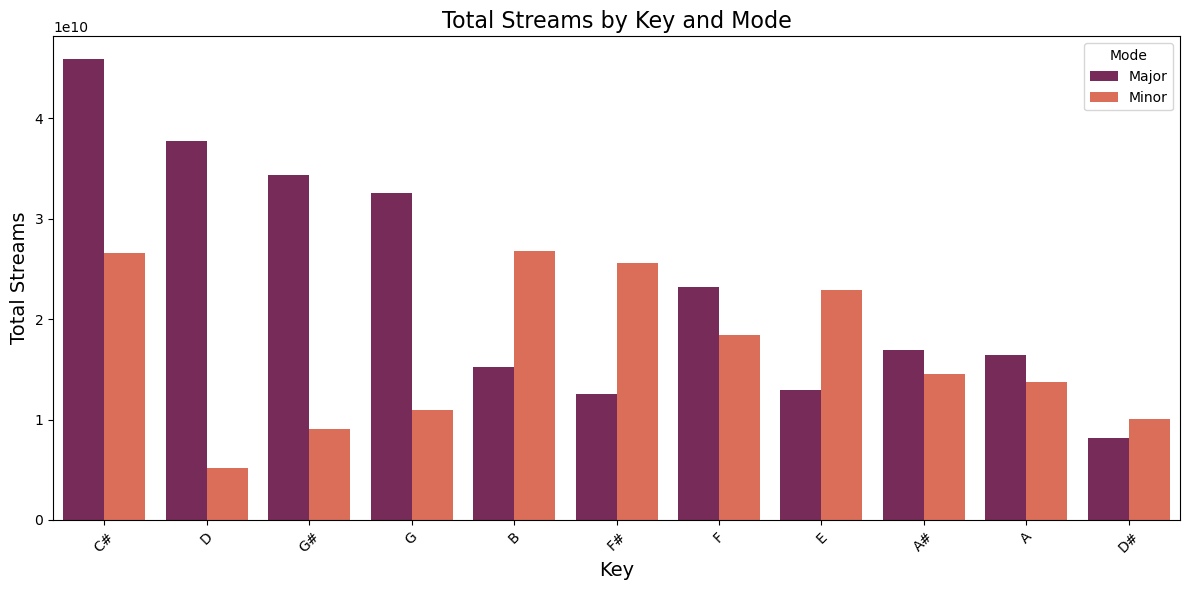

In [33]:
#Convert columns with non-numeric values to numeric
numeric_columns = ['streams']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Group by key and mode and calculate total streams
keymode_sum = df.groupby(['key', 'mode']).agg(
    total_streams=('streams', 'sum')
).reset_index()

#Sort the summary by total streams in descending order
keymode_sum = keymode_sum.sort_values(by='total_streams', ascending=False)

#Display the sorted sum
print(keymode_sum)

#Visualize Barplot for Total Streams by Key and Mode
plt.figure(figsize=(12, 6))
sns.barplot(data=keymode_sum, x='key', y='total_streams', hue='mode', palette='rocket')

#Label the plot's parameters
plt.title('Total Streams by Key and Mode', fontsize=16)
plt.xlabel('Key', fontsize=14)
plt.ylabel('Total Streams', fontsize=14)
plt.legend(title='Mode')
plt.xticks(rotation=45)
plt.tight_layout()

#Show the plot
plt.show()


### Most Frequently Appearing Artists in Playlists or Charts.

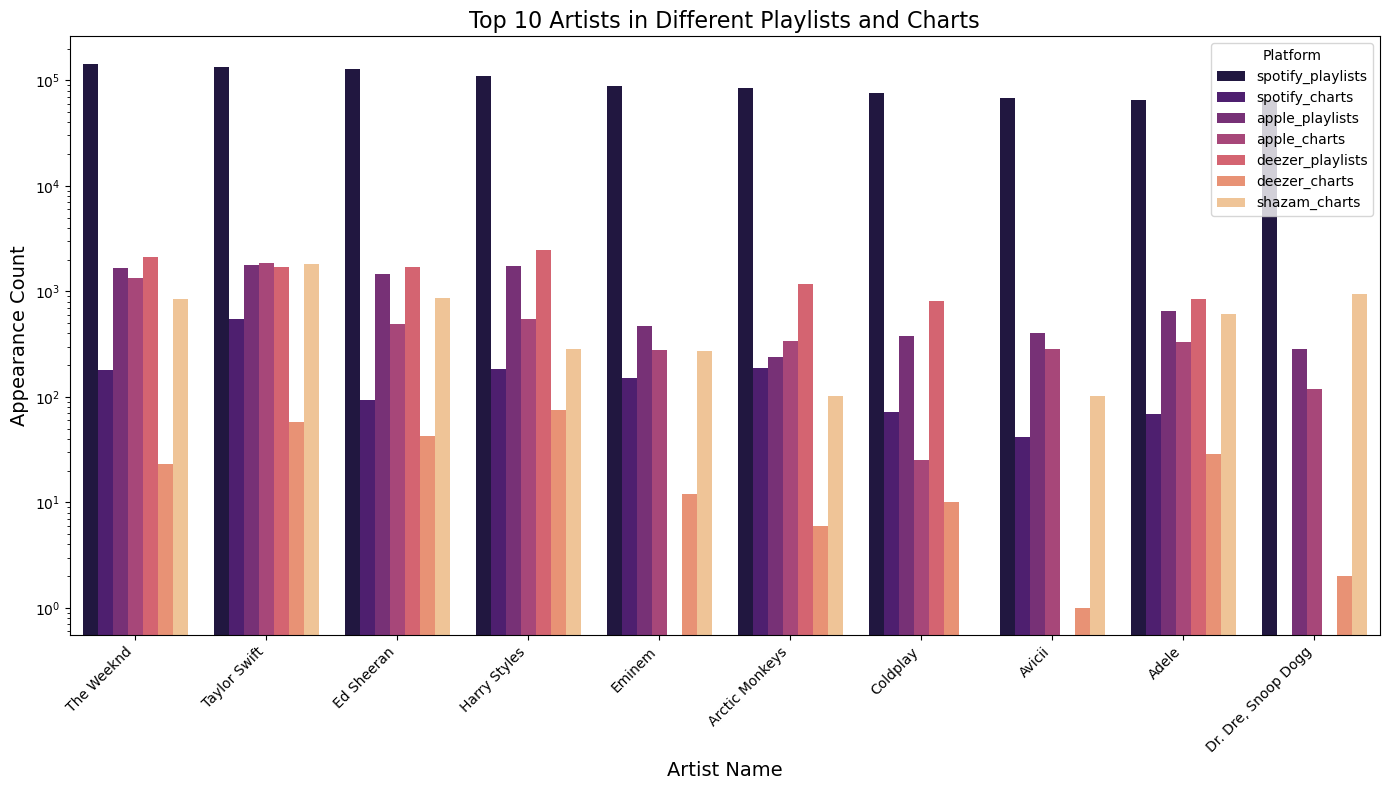

In [35]:
#Create DataFrame to count occurrences of each artist in different playlists and charts
artist_total = df.groupby('artist(s)_name').agg(
    spotify_playlists=('in_spotify_playlists', 'sum'),
    spotify_charts=('in_spotify_charts', 'sum'),
    apple_playlists=('in_apple_playlists', 'sum'),
    apple_charts=('in_apple_charts', 'sum'),
    deezer_playlists=('in_deezer_playlists', 'sum'),
    deezer_charts=('in_deezer_charts', 'sum'),
    shazam_charts=('in_shazam_charts', 'sum')).reset_index()

#Add total column for the overall appearance in playlists and charts
artist_total['total_appearance'] = artist_total[['spotify_playlists', 'spotify_charts', 'apple_playlists', 'apple_charts', 
                                                 'deezer_playlists', 'deezer_charts', 'shazam_charts']].sum(axis=1)

#Sort by total appearances in descending order 
artist_total = artist_total.sort_values(by='total_appearance', ascending=False).head(10)

# Melt the DataFrame to have 'Platform' and 'Appearance Count' columns for plotting
melted = artist_total.melt(id_vars='artist(s)_name', 
                           value_vars=['spotify_playlists', 'spotify_charts', 'apple_playlists', 'apple_charts', 'deezer_playlists',
                                       'deezer_charts', 'shazam_charts'],
                           var_name='Platform', value_name='Appearance Count')

#Set the graph and separate bar plot for each platform for top artists
plt.figure(figsize=(14, 8))
sns.barplot(data=melted, x='artist(s)_name', y='Appearance Count', hue='Platform', palette='magma')

#Label the plot's parameters
plt.title('Top 10 Artists in Different Playlists and Charts', fontsize=16)
plt.ylabel('Appearance Count', fontsize=14)
plt.yscale('log')
plt.xlabel('Artist Name', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Show the plot
plt.show()
